# Visualization of color coding (img -> 9bit cluster)

In [1]:
import cv2
import os
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shutil import copy2
from datetime import datetime

from src.np_utils import color_quantize_np, generate_primer
# from src.runner import run_preds
size = 32  # depends on the model: 32, *48, *64 (48 and 64 are only avaiable with XL model)

color_clusters_dir = "clusters/kmeans_centers.npy"
timestamp = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')

## Load original image

In [2]:
image_path = 'test_input2.jpg'
dim=(size,size)

x = np.zeros((2,size,size,3),dtype=np.uint8)

img_np = cv2.imread(image_path)
img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)   # BGR -> RGB, default one is BGR and we need RGB
H,W,C = img_np.shape
D = min(H,W)
img_np = img_np[:D,:D,:C] # crop square image with shorter dim

## Scale original image

In [3]:
scaled = cv2.resize(img_np,dim, interpolation = cv2.INTER_AREA)

## Recode with 9bit color cluster

In [4]:
scaled_clustered = np.zeros((1,size,size,3),dtype=np.uint8)
clusters = np.load(f"{color_clusters_dir}")
tempx1 = color_quantize_np(scaled, clusters).reshape((size, size))

scaled_clustered[0] = np.array(list(map(lambda y: clusters[y]*127.5 + 128, tempx1)))

print(scaled_clustered.shape)

(1, 32, 32, 3)


## Display results

Text(0.5, 1.0, '9bit')

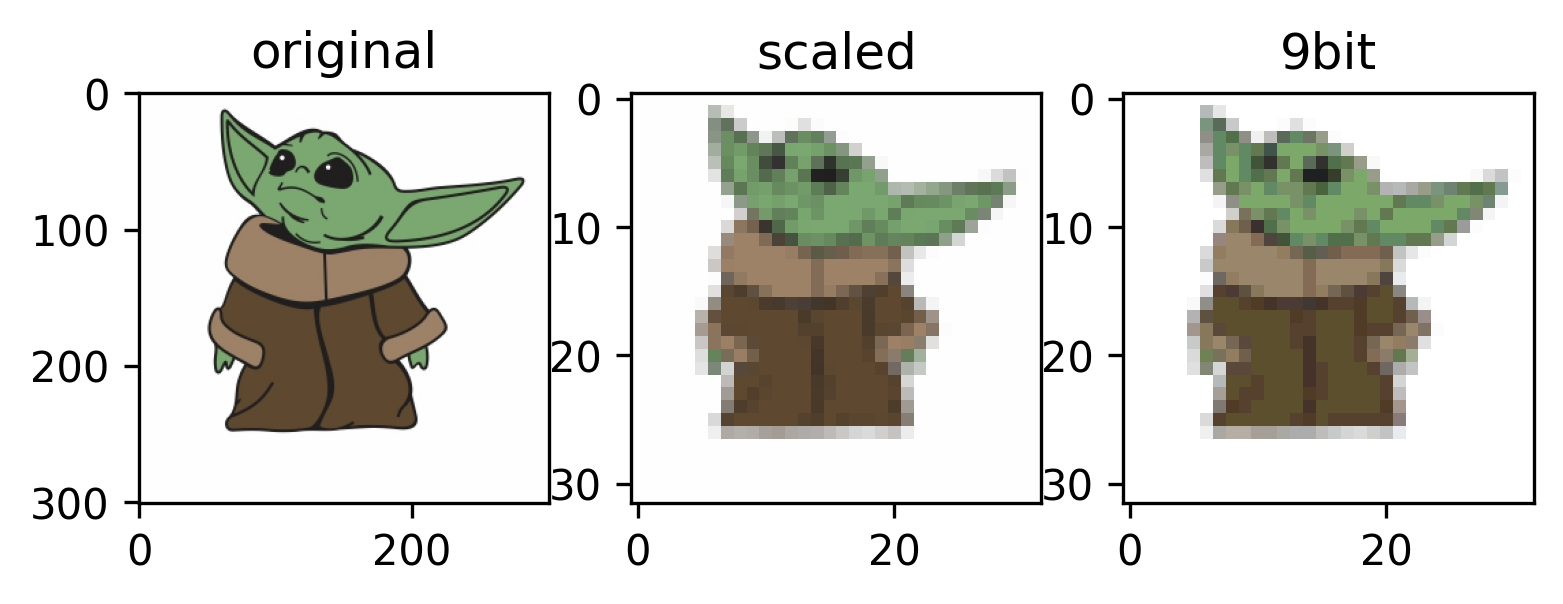

In [5]:
fig, ax = plt.subplots(1,3, dpi=300)
    
ax[0].imshow(img_np)
ax[0].set_title('original')
ax[1].imshow(scaled)
ax[1].set_title('scaled')
ax[2].imshow(scaled_clustered[0])
ax[2].set_title('9bit')